In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler().fit(X_train)
encoder = LabelBinarizer().fit(y_train)

#data for training phase
X_train = scaler.transform(X_train)
y_train = encoder.transform(y_train)

#data for testing phase
X_test = scaler.transform(X_test)
y_test = encoder.transform(y_test)

In [2]:
import numpy as np

class MLP:
    def __init__(self, eta=0.01, epoch=10000):
        self.eta = eta
        self.epoch = epoch
        self.wi = None
        self.wo = None
        self.error_square = np.empty((0, 3))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y):
        self.wi = np.random.uniform(-0.5, 0.5, (X.shape[1] + 1, 2))
        self.wo = np.random.uniform(-0.5, 0.5, (3, 3))
        X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.epoch):
            sub_error = np.array([0.0,0.0,0.0])
            
            for x, y in zip(X, Y):
                # Feed Forward
                u = x @ self.wi
                H = np.hstack([1, self.sigmoid(u)])
                Y_hat = self.sigmoid(H @ self.wo)
                
                # Back Propagation
                e = y - Y_hat
                delta_o = e * Y_hat * (1 - Y_hat)
                self.wo += self.eta * np.outer(H, delta_o)
                
                delta_h = (delta_o @ self.wo[1:].T) * H[1:] * (1 - H[1:])
                self.wi += self.eta * np.outer(x, delta_h)
                
                sub_error += e ** 2
                
            self.error_square = np.append(self.error_square, [sub_error/X.shape[0]], axis=0)
            
            # check overfitting
            # if len(self.error_square) > 2 and self.error_square[-1] > self.error_square[-2]:
            #     print('round :', i)
            #     break
            
    def decision_function(self, value):
        def binary(x):
            return 1 if x >= 0.5 else 0
        vectorized_binary = np.vectorize(binary)
        return vectorized_binary(value)
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        H = self.sigmoid(X @ self.wi)
        H = np.insert(H, 0, 1, axis=1)
        Y_hat = self.sigmoid(H @ self.wo)
        return self.decision_function(Y_hat)


In [3]:
# class MLP:
#     def __init__(self, eta=0.01, epoch=10000):
#         self.eta =eta
#         self.epoch = epoch
#         self.W_hidden_layer_1 = None
#         self.W_output_layer = None
#         self.error_square = np.array([])
#         self.Hidden_layer_node_1 = 2
#         self.output_layer_node = 3
#         # self.error = []

#     def sigmoid(self, x):
#         return 1/(1 + np.exp(-x))

#     def fit(self, X, Y):
#         self.W_hidden_layer_1 = np.random.uniform(-0.5,0.5,(X.shape[1]+1,self.Hidden_layer_node_1))
#         self.W_output_layer = np.random.uniform(-0.5,0.5,(self.Hidden_layer_node_1+1 ,self.output_layer_node))
#         print(self.W_output_layer)
#         X = np.insert(X,0,1,axis=1)
#         for i in range(self.epoch):
#             sub_error = np.array([])
#             for x,y in zip(X,Y):
#                         #Feed Forward
#                 U_hidden_layer_1 = x @ self.W_hidden_layer_1
#                 H_hidden_layer_1 = np.hstack([1, self.sigmoid(U_hidden_layer_1)])
                
#                 U_output_layer_1 = H_hidden_layer_1 @ self.W_output_layer
#                 Y_hat = self.sigmoid(U_output_layer_1)
                
#                         #Back Propagation
#                 e = y-Y_hat
#                 delta_o = e * Y_hat * (1 - Y_hat)
#                 print(self.eta * delta_o * H_hidden_layer_1)
#                 self.W_output_layer += self.eta * delta_o * H_hidden_layer_1
                
#                 ##^^^ fuck right here ^^^
#                 delta_h = np.outer(x, np.expand_dims(delta_o * (self.wo[1:]) * (H*(1-H))[1:], axis=1))
#                 self.wi += self.eta * delta_h
#                 sub_error = np.append(sub_error,e**2)
#             self.error_square = np.append(self.error_square, sub_error.mean())
#             if len(self.error_square) > 2 and self.error_square[-1] > self.error_square[-2]:
#                 print('round :', i)
#                 break

            
#     def predict(self, X):
#         predictions = []
#         X = np.insert(X,0,1,axis=1)
#         for x in X:
#             H = np.hstack([1, self.sigmoid(x @ self.wi)])
#             Y_hat = self.sigmoid(H @ self.wo)
#             predictions.append(Y_hat)
#         return predictions
    
#     def predict(self, X):
#         predictions = []
#         X = np.insert(X,0,1,axis=1)
#         H = self.sigmoid(X@self.wi)
#         H = np.insert(H,0,1,axis=1)
#         Y_hat = self.sigmoid(H @ self.wo)
#         return Y_hat
    
    
    

In [4]:
# array1 = np.array([1,2,3])
# array2 = np.array([2,3])

# np.outer(array1, array2)

In [5]:
model = MLP(eta=0.02, epoch=10000)
model.fit(X_train, y_train)

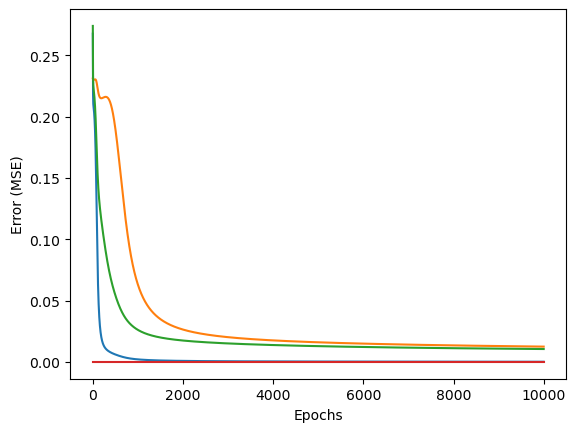

In [7]:
# Plotting training error over epochs
plt.plot(model.error_square)

#Plotting y = 0 
plt.plot(np.linspace(0,model.epoch,10), np.zeros(10))
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
# plt.title(f'Training Error of MLP at node :{i+1}')
plt.show()


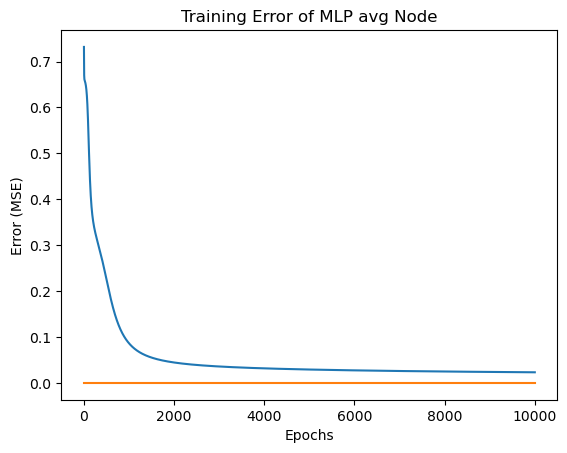

In [ ]:
plt.plot(model.error_square.sum(axis=1))
plt.plot(np.linspace(0,model.epoch,10), np.zeros(10))
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title(f'Training Error of MLP avg Node')
plt.show()

In [ ]:
model.error_square.sum(axis=1).min()

0.023147859136952893

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_class_pred = encoder.inverse_transform(y_pred)
y_class_test = encoder.inverse_transform(y_test)

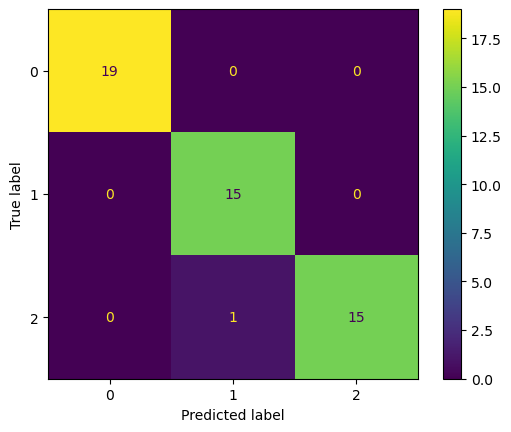

In [ ]:
cm = confusion_matrix(y_class_test, y_class_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print('Accuracy :',accuracy_score(y_class_pred, y_class_test))
print('Precision :', precision_score(y_class_pred, y_class_test, average=None))
print('Recall :', recall_score(y_class_pred, y_class_test, average=None))
print('F1 score :', f1_score(y_class_pred, y_class_test, average=None))

Accuracy : 0.98
Precision : [1.     1.     0.9375]
Recall : [1.     0.9375 1.    ]
F1 score : [1.         0.96774194 0.96774194]
